In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sb

In [15]:
df = pd.read_csv("kc_final.csv")
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Explore this dataset using what you have learned in data preprocessing and data visualization 
df.dropna(axis=0, how='any', thresh=None,inplace=True)
df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

MSE 125732960406.26068
R squared -0.00012273360729109228


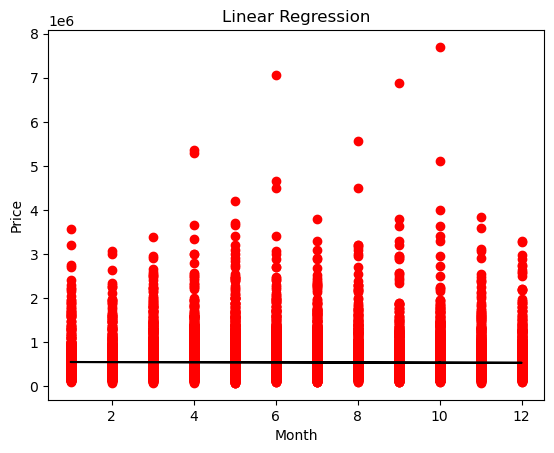

In [16]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (month in the date). 

from datetime import datetime

months=df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').month)
x=months.values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set.
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

#Plot the linear regression. 
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Month")
plt.plot(x,model.predict(x),color="k")
plt.show()

MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "month" is not very correlate with the target "Price of the house". 

=> the feature "month" is not enough  to construct our model.
The solution : find more significant and important features.


In [26]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (bedrooms). 

x=df["bedrooms"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 113635389576.1048
R squared 0.09610545961721906


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "bedrooms" is not very correlate with the target "Price of the house". 

=> the feature "bedrooms" is not enough  to construct our model.
The solution : find more significant and important features.

In [36]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (bedrooms). 

x=df["bathrooms"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 89550909069.11131
R squared 0.2876816096127013


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "bathrooms" is not very correlate with the target "Price of the house". 

=> the feature "bathrooms" is not enough  to construct our model.
The solution : find more significant and important features.

In [27]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (sqft_living). 

x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0.5 : Half of the output variance can be explained by the model's input (sqft_living).

the feature "sqft_living" is correlate with the target "Price of the house".  

=> the feature "sqft_living" is acceptable  to construct our model.


In [28]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (sqft_lot). 

x=df["sqft_lot"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 124884129192.88837
R squared 0.006629158583476458


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "sqft_lot" is not very correlate with the target "Price of the house". 

=> the feature "sqft_lot" is not enough  to construct our model.
The solution : find more significant and important features.

In [29]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (floors). 

x=df["floors"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 117258331522.09335
R squared 0.06728734707922635


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "floors" is not very correlate with the target "Price of the house". 

=> the feature "floors" is not enough  to construct our model.
The solution : find more significant and important features.

In [30]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (waterfront). 

x=df["waterfront"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 118566864869.79541
R squared 0.05687882774991526


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "waterfront" is not very correlate with the target "Price of the house". 

=> the feature "waterfront" is not enough  to construct our model.
The solution : find more significant and important features.

In [31]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (view). 

x=df["view"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 106764161864.068
R squared 0.15076154200322023


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "view" is not very correlate with the target "Price of the house". 

=> the feature "view" is not enough  to construct our model.
The solution : find more significant and important features.

In [32]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (condition). 

x=df["condition"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 125447690427.73447
R squared 0.0021464008330169815


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "condition" is not very correlate with the target "Price of the house". 

=> the feature "condition" is not enough  to construct our model.
The solution : find more significant and important features.

In [33]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (grade). 

x=df["grade"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 68216329489.98443
R squared 0.45738411228260756


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0.5 : Half of the output variance can be explained by the model's input (grade).

the feature "grade" is correlate with the target "Price of the house".  

=> the feature "grade" is acceptable  to construct our model.

In [34]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (sqft_basement). 

x=df["sqft_basement"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 112566850489.23206
R squared 0.1046049829647675


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "sqft_basement" is not very correlate with the target "Price of the house". 

=> the feature "sqft_basement" is not enough  to construct our model.
The solution : find more significant and important features.

In [35]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (sqft_above). 

x=df["sqft_above"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 79241092180.49612
R squared 0.3696893999034565


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0.5 : Half of the output variance can be explained by the model's input (sqft_above).

the feature "sqft_above" is correlate with the target "Price of the house".  

=> the feature "sqft_above" is acceptable  to construct our model.

In [38]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (yr_built). 

x=df["yr_built"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 125178068503.77393
R squared 0.004291065324814269


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "yr_built" is not very correlate with the target "Price of the house". 

=> the feature "yr_built" is not enough  to construct our model.
The solution : find more significant and important features.

In [39]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (yr_renovated). 

x=df["yr_renovated"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 124484122026.30809
R squared 0.009810951644024235


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "yr_renovated" is not very correlate with the target "Price of the house". 

=> the feature "yr_renovated" is not enough  to construct our model.
The solution : find more significant and important features.

In [40]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (zipcode). 

x=df["zipcode"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 125312887316.20615
R squared 0.0032186706337505866


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "zipcode" is not very correlate with the target "Price of the house". 

=> the feature "zipcode" is not enough  to construct our model.
The solution : find more significant and important features.

In [41]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (lat). 

x=df["lat"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 113502118121.8914
R squared 0.09716554609469508


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "lat" is not very correlate with the target "Price of the house". 

=> the feature "lat" is not enough  to construct our model.
The solution : find more significant and important features.

In [42]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (long). 

x=df["long"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 125632797217.05615
R squared 0.0006739984689312362


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "long" is not very correlate with the target "Price of the house". 

=> the feature "long" is not enough  to construct our model.
The solution : find more significant and important features.

In [43]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (sqft_living15). 

x=df["sqft_living15"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 80478264938.9221
R squared 0.35984850697368287


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0.5 : Half of the output variance can be explained by the model's input (sqft_above).

the feature "sqft_living15" is correlate with the target "Price of the house".  

=> the feature "sqft_living15" is acceptable  to construct our model.

In [44]:
#Split your dataset into a training set and a testing set. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# -----------------------------------------------------------features (sqft_lot15). 

x=df["sqft_lot15"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

#Apply linear regression to your training set. 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

# Measure the performance of linear regression using the testing set. 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 124922791582.09825
R squared 0.006321624789159985


MSE is not near 0 :the data points are dispersed widely around its central moment (mean).
R squared is near 0 : none of the variance of the output around its mean.

the feature "sqft_lot15" is not very correlate with the target "Price of the house". 

=> the feature "sqft_lot15" is not enough  to construct our model.
The solution : find more significant and important features.

#Write a paragraph selecting the most important features (feature selection). 
According to R squared the features can be classified according to their correlation as:

sqft_living - grade- sqft_above- sqft_living15- bathrooms-view - sqft_basement - lat- bedrooms- floors- waterfont -...

In [46]:
#Apply multiple-linear regression and compare it to the linear model ("sqft_living","grade"). 

x=df[["sqft_living","grade"]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 57413775762.864265
R squared 0.5433112989852686


In [47]:
#Apply multiple-linear regression and compare it to the linear model ("sqft_living","grade","sqft_above"). 

x=df[["sqft_living","grade","sqft_above"]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 56491826520.69129
R squared 0.550644796847324


In [52]:
#Apply multiple-linear regression and compare it to the linear model ("sqft_living","grade","sqft_above","sqft_living15"). 

x=df[["sqft_living","grade","sqft_above","sqft_living15"]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 56391021662.11875
R squared 0.5514466329799554


In [53]:
#Apply multiple-linear regression and compare it to the linear model ("sqft_living","grade","sqft_above","sqft_living15","bathrooms"). 

x=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms"]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 56262505729.60954
R squared 0.5524688924202636


In [54]:
#Apply multiple-linear regression and compare it to the linear model ("sqft_living","grade","sqft_above","sqft_living15","bathrooms","view"). 

x=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view"]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 52329809274.13159
R squared 0.5837508976859607


In [56]:
#Apply multiple-linear regression and compare it to the linear model ("sqft_living","grade","sqft_above","sqft_living15", "view","sqft_basement"). 

x=df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement"]]  #we have more than one input
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 52338940967.37721
R squared 0.5836782610918507


Adding best features alows to get better R squared with:

"sqft_living","grade","sqft_above","sqft_living15","bathrooms" and "view"

In [58]:
#Apply polynomial regression and compare it to linear and multilinear regression. 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

# create matrix and vectors
x= df[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))


MSE:  44862944300.302376
R squared:  0.6431448814510224


using the best features ("sqft_living","grade","sqft_above","sqft_living15","bathrooms" and "view") for multilinear Model, polynomial regression gets better R squared.